In [15]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
DATASET_DIR = "lontaraV3"
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
VAL_DIR = os.path.join(DATASET_DIR, "val")
PRED_DIR = os.path.join(DATASET_DIR, "pred")

In [4]:
# Periksa jumlah data di setiap folder
def count_images(directory):
    total_images = sum(len(files) for _, _, files in os.walk(directory))
    print(f"Jumlah gambar di {directory}: {total_images}")
    
count_images(TRAIN_DIR)
count_images(VAL_DIR)
count_images(PRED_DIR)

Jumlah gambar di lontaraV3/train: 7452
Jumlah gambar di lontaraV3/val: 3726
Jumlah gambar di lontaraV3/pred: 23


In [5]:

# 3. Data Preparation
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR, target_size=IMG_SIZE,
                                                    batch_size=BATCH_SIZE, class_mode='categorical')

val_generator = val_datagen.flow_from_directory(VAL_DIR, target_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE, class_mode='categorical')


Found 7452 images belonging to 23 classes.
Found 3726 images belonging to 23 classes.


In [6]:

# 4. Modeling
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 50s 1us/step


In [7]:
# 5. Training
EPOCHS = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


233/233 ━━━━━━━━━━━━━━━━━━━━ 2885s 12s/step - accuracy: 0.2330 - loss: 2.6498 - val_accuracy: 0.8089 - val_loss: 1.2173
Epoch 2/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 2705s 12s/step - accuracy: 0.6536 - loss: 1.2993 - val_accuracy: 0.8618 - val_loss: 0.7959
Epoch 3/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 2874s 12s/step - accuracy: 0.7806 - loss: 0.8453 - val_accuracy: 0.8521 - val_loss: 0.5875
Epoch 4/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 2721s 12s/step - accuracy: 0.8303 - loss: 0.6442 - val_accuracy: 0.8717 - val_loss: 0.4891
Epoch 5/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 2717s 12s/step - accuracy: 0.8628 - loss: 0.5287 - val_accuracy: 0.8596 - val_loss: 0.4593
Epoch 6/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 2726s 12s/step - accuracy: 0.8873 - loss: 0.4294 - val_accuracy: 0.8615 - val_loss: 0.4205
Epoch 7/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 2816s 12s/step - accuracy: 0.9050 - loss: 0.3715 - val_accuracy: 0.9278 - val_loss: 0.2876
Epoch 8/10
233/233 ━━━━━━━━━━━━━━━━━━━━ 2549s 11s/step - accuracy: 0.9167 - loss: 0.3162 - val

In [ ]:

# 6. Evaluation
val_generator.reset()
predictions = model.predict(val_generator)
y_pred = predictions.argmax(axis=1)
y_true = val_generator.classes

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(val_generator.class_indices.keys())))




117/117 ━━━━━━━━━━━━━━━━━━━━ 879s 8s/step

Confusion Matrix:
[[ 3 11  6  7  8  5  8  4  6  7  4  3  9  6  5 13 11 10  6  6  6  8 10]
 [ 2  8  1  7  5  7 11 11  7  5  8  6  8  4  8  9  9  7 13  3  9  5  9]
 [ 0  6  9  8  3  6  6 10  8 12  5  8  4  8  4 12  8  8  7  6  6  8 10]
 [ 4 14 10  3  3  8  8 10  4 16  9  4  6  4  3  6 11  4  3 10  4 10  8]
 [ 3  2 10  6  3  6 11  8  6 10  6  7 10  8  6  9 11  2  6  9  4 10  9]
 [ 5  4  6  3  4 11  6  9  8  5 10  8  4  8  6  7  8  8  5  8  9  5 15]
 [ 5  4  5  5  4  8 11  9  7  7  7 10  5 10  6  8 10  1  4  7  5 14 10]
 [ 3  6  6  9  2  8 10  4  5  8  9  8  8  6  7  8  4  8  8  8  8  6 13]
 [ 3  7 10 10  3  7  8  9  4  4 11  6 10  8  6  9 10  8  6  4 10  4  5]
 [ 5  4  9  5  3  8  7  7  6  5 13  7  8  8  7  7  5  5  5  5  9 12 12]
 [ 2  9  9  9  4  8 10  5  3  9 15  5  3  4  6 15  5  4  7  7 12  4  7]
 [ 5  7  9  6  7  6  2  5  7  7 13  4  9  8  9  8 10  3  8  7  6  8  8]
 [ 1  6  7  4  8  4 13  7  3  7  5  6  9  7 10  5 11  6 10  5  5 12 11]
 [ 

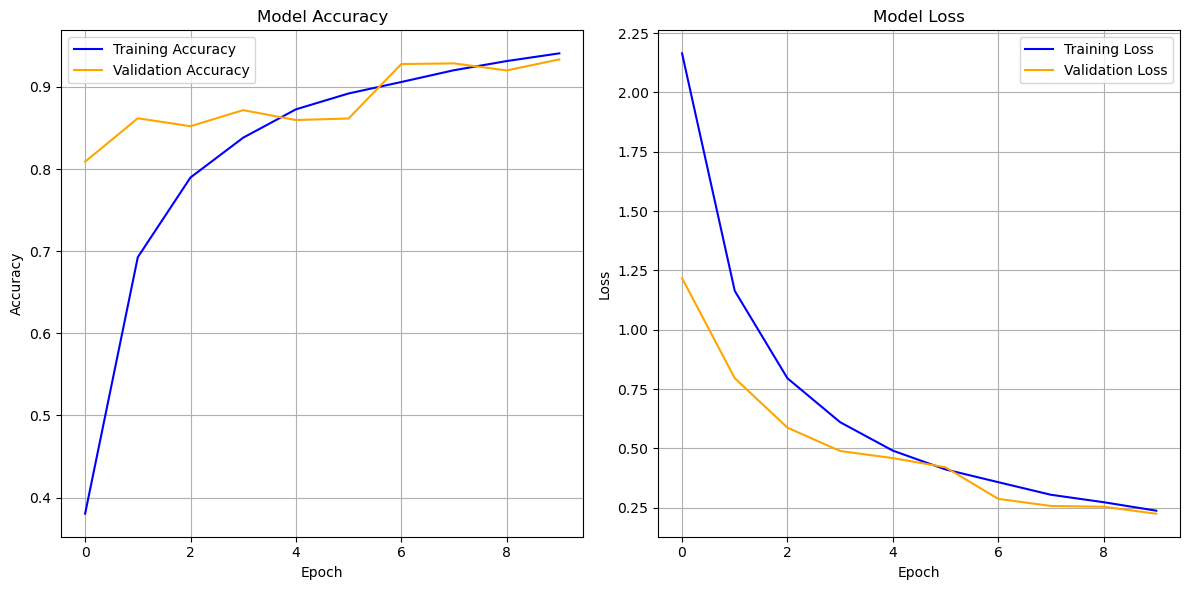

In [10]:

# Plot Akurasi
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 23)             │         5,911 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,000,775 (129.70 MB)

 Trainable params: 6,428,695 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,857,392 (49.05 MB)

In [ ]:
# Save Model
model.save("Otaknya.h5")
print("Otaknya.h5")

Model disimpan dengan nama aksara_jawa_vgg16.h5
